
<center> <h1>COSC 522 Machine Learning Homework 1</h1> </center>

<br>
<br>
<center> <h3> Yangsong Gu </h3></center>
<center> <h3> Aug 29, 2021 <h3></center>

In [1]:
import numpy as np
from sympy import lambdify
from sympy import Symbol, symbols, simplify
import sympy
import matplotlib.pyplot as plt

### Problem 1 (1)

$Given \mu_1 = 4, \sigma_1 = 2, \mu_2 = 6, \sigma_2 = 3, \mu_3 = 5, \sigma_3 = 2$, the sketch plot of density functions would be like: (more details, since the area underneath each curve should be 1, thus, the peak of class 2 distribution is lower than class 1 and 3. In addition, the standard deviation of class 1 and 3 are equal, so they only have one intersection and same shape)

<!-- 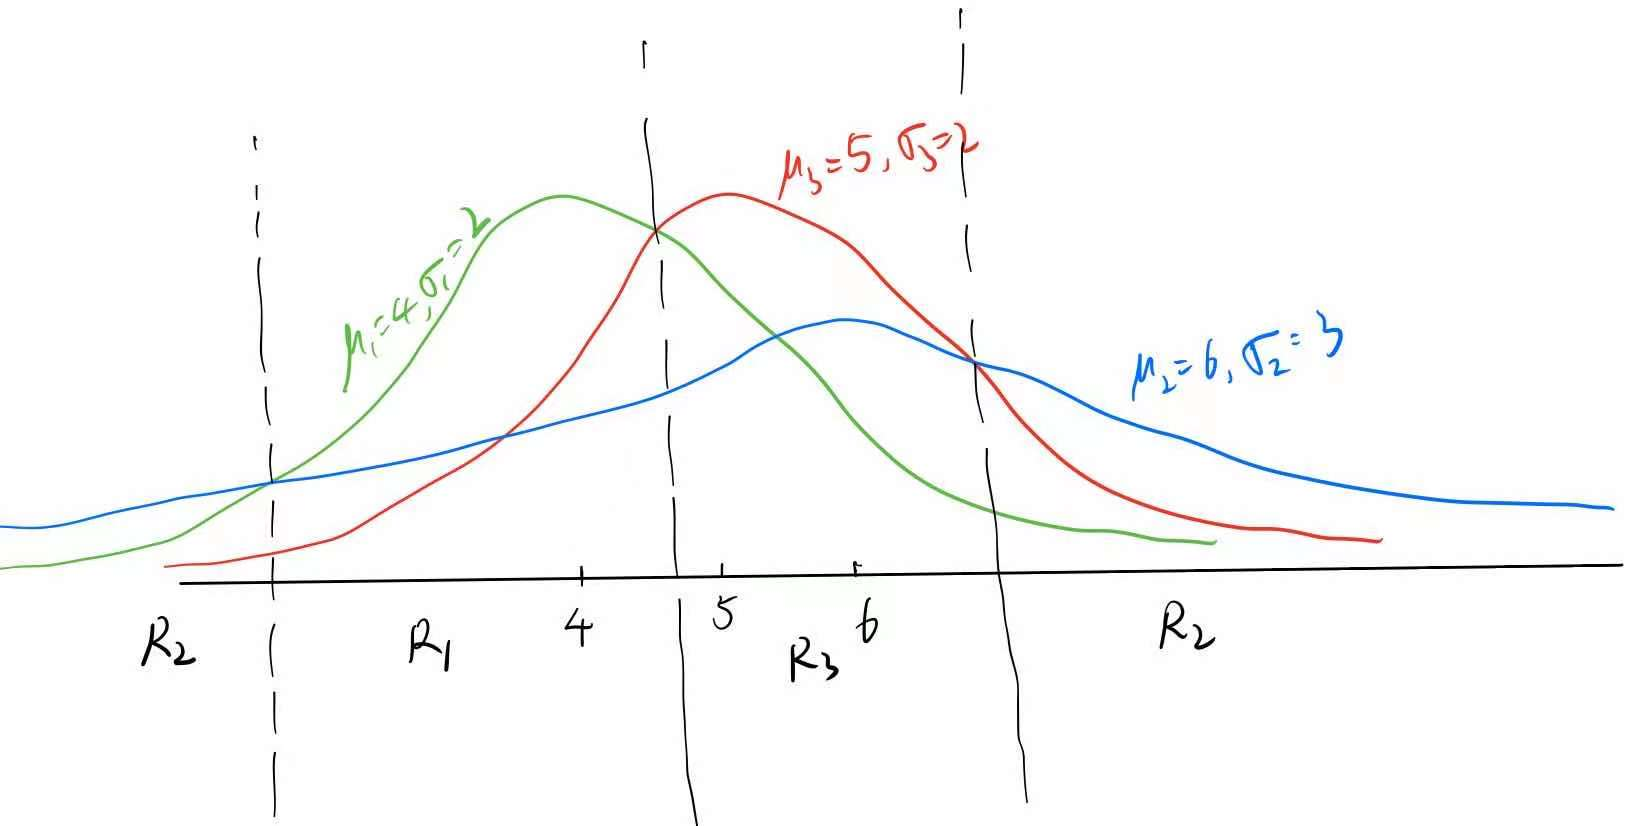 -->
<!-- <img src = './sketch.jpg'> -->
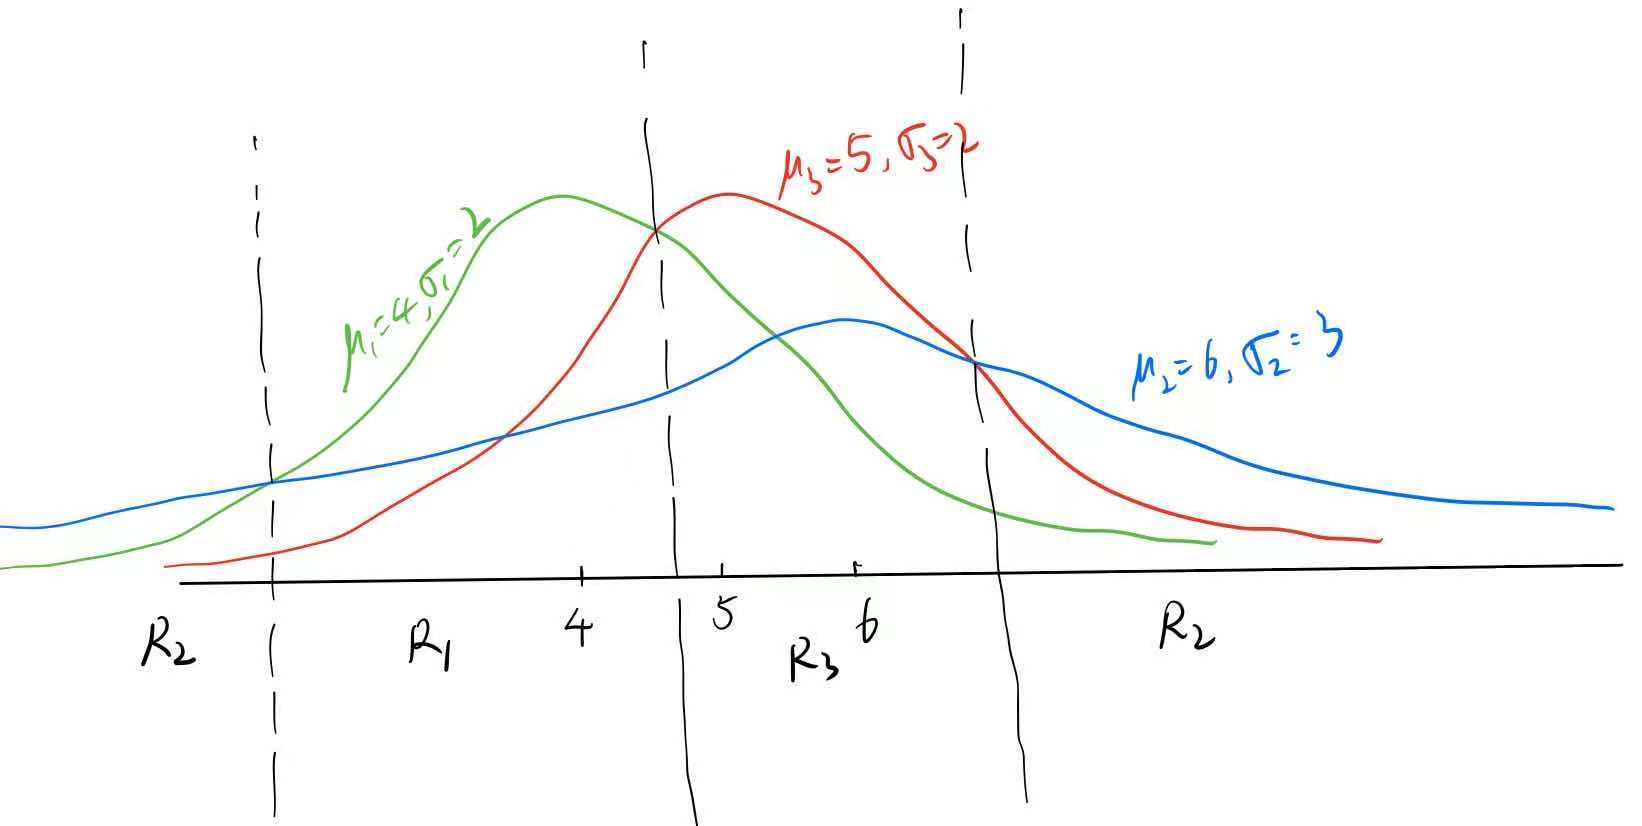
Thus, as figure indicates, there would be four decision regions seperated by 3 decision boundaries when the prior probability is equal.

### Problem 1 (2a)

In [2]:
mu1, sigma1 = 4, 2
mu2, sigma2 = 6, 3
mu3, sigma3 = 5, 2

In [3]:
# define a normal distribution function whose input is the mu, std and x
x, mu, sigma = symbols('x mu sigma')
norm_distr = (1/(sigma * np.sqrt(2 * np.pi))) * sympy.exp(-0.5*((x - mu)/sigma)**2)
var = (x, mu, sigma)
norm_distr_func = lambdify(var, norm_distr, modules = 'numpy')

Assume the equal prior probability, we have $P(w_1)=P(w_2)=P(w_3)=\frac{1}{3}$

In [4]:
# p1 is p(x|w_1)*p(w_1)
p1 = norm_distr_func(x = 4.7, mu = mu1, sigma = sigma1) * 1/3
p2 = norm_distr_func(x = 4.7, mu = mu2, sigma = sigma2) * 1/3
p3 = norm_distr_func(x = 4.7, mu = mu3, sigma = sigma3) * 1/3
print(p1, p2, p3)

0.0625400578194897 0.040354514805713136 0.06574655515131488


$$P(w_1|x) \propto p(x|w_1)\cdot{P(w_1)} = \frac{1}{\sigma_1 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_1}{\sigma_1})^2)\cdot P(w_1) = 0.063 $$

$$P(w_2|x) \propto p(x|w_2)\cdot{P(w_2)} = \frac{1}{\sigma_2 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_2}{\sigma_2})^2)\cdot P(w_2) = 0.040 $$

$$P(w_1|x) \propto p(x|w_3)\cdot{P(w_3)} = \frac{1}{\sigma_3 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_3}{\sigma_3})^2)\cdot P(w_3) = 0.066 $$

Above results show that $P(w_3|x)$ is the largest. According to the MAP, x will belong to class 3. 

### Problem 1 (2b)


<!-- $$\frac{p(x|w_1)\cdot P(w_1)}{p(x|w_1)\cdot P(w_1)+ p(x|w_1)\cdot P(w_1)+ p(x|w_1)\cdot P(w_1)} = p(x|w_2)\cdot{P(w_2)}$$ $$p(x|w_1)\cdot{P(w_1)} = p(x|w_3)\cdot{P(w_3)}$$
$$p(x|w_2)\cdot{P(w_2)} = p(x|w_2)\cdot{P(w_3)}$$ -->

$$P(w_i|x) = \frac{p(x|w_i)\cdot P(w_i)}{\sum_{i=1}^{i=3} p(x|w_i)\cdot P(w_i)}$$

To find out the decision boundary, by definition, 
we set $$P(w_1|x) = P(w_2|x)\ and \\
      P(w_1|x) = P(w_3|x)\ and \\
      P(w_2|x) = P(w_3|x) $$ to seek for all possible intersections. It should be noted that the denominator can be cancelled out in calculation. 

<!-- $$\frac{1}{\sigma_1 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_1}{\sigma_1})^2)\cdot = \frac{1}{\sigma_2 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_2}{\sigma_2})^2)$$

$$\frac{1}{\sigma_1 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_1}{\sigma_1})^2)\cdot = \frac{1}{\sigma_3 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_3}{\sigma_3})^2)$$

$$\frac{1}{\sigma_2 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_2}{\sigma_2})^2)\cdot = \frac{1}{\sigma_3 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_3}{\sigma_3})^2)$$ -->

By sovling above equations, we have the following solutions for x, which are:

$$x_1 = -1.0057, x_2 = 1.5021, x_3 = 4.5000, x_4 = 5.8057, x_5 = 6.8979$$

Combing the sketch plot in quation 1(1), the exact decision boundaries that distinguish different decision are $x_1 = -1.0057, x_2 = 4.5, x_3 = 6.8979$

The equations are solved by below chunk code. 

In [5]:
# prblem 1(2b)
pw1 = norm_distr.subs(mu, mu1).subs(sigma, sigma1)*1/3
pw2 = norm_distr.subs(mu, mu2).subs(sigma, sigma2)*1/3
pw3 = norm_distr.subs(mu, mu3).subs(sigma, sigma3)*1/3

# solve equations
x1 = sympy.solve(pw1 - pw2, x)
x2 = sympy.solve(pw2 - pw3, x)
x3 = sympy.solve(pw1 - pw3, x)

xintersections = x1 + x2 + x3
xintersections.sort()
print(xintersections)

[-1.00568606256619, 1.50209385694062, 4.50000000000000, 5.80568606256619, 6.89790614305938]


### Problem 1 (2c)

There are several scenarios that cause the errors.
1. $P(w_1|x) = P(error|w_2, w_3) = P(error|w_2) + P(error|w_3)  $ if we labeled class 1 while class 2 or class 3 is true.
2. $P(w_2|x) = P(error|w_1, w_3) = P(error|w_1) + P(error|w_3) $ if we labeled class 2 while class 1 or class 3 is true.
3. $P(w_3|x) = P(error|w_1, w_2) = P(error|w_1) + P(error|w_2) $ if we labeled class 3 while class 1 or class 2 is true. 

The overall error is the summation of among above three errors, that is 

$$P(error) = P(error|w_2, w_3) + P(error|w_1, w_3) + P(error|w_1,w_2) \\
           = \int_{R1} P(error|w_2) + P(error|w3) + \int_{R2} P(error|w_1) + P(error|w_3) +                                      \int_{R3} P(error|w_1) + P(error|w_2)\\
           = \int_{-1.0057}^{4.5} P(w_2|x)p(x)dx + P(w_3|x)p(x)dx + \\
             \big[\int_{6.8979}^{+\infty} P(w_1|x)p(x)dx + P(w_3|x)p(x)dx + \\
             \int_{-\infty}^{-1.0057} P(w_1|x)p(x)dx + P(w_3|x)p(x)dx \big] + \\
             \int_{4.5}^{6.8979} P(w_1|x)p(x)dx + P(w_2|x)p(x)dx  \\
           = 0.2329 + 0.0842 + 0.2122 \\
           = 0.5293
           $$  
Where R1, R2, R3 region can refer to below figure 1, note that the colored area just denotes the decision region, not the decision error.

Below chunk is used to compute the integrals of each error.

region 1 error:  0.232909424858456 region 2 error:  0.0841653343161805 region 3 error 0.212241595038133
overall error 0.529316354212769


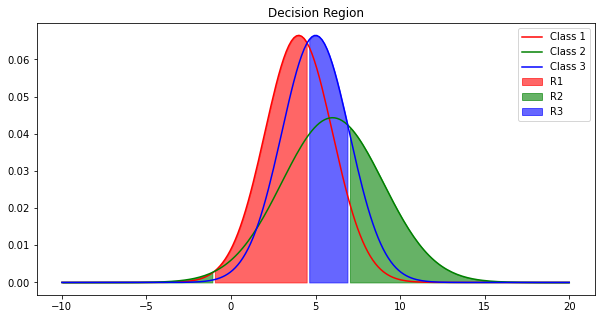

In [6]:
# pw1 = p(x|w_i)p(w_1)
pw1 = norm_distr.subs(mu, mu1).subs(sigma, sigma1)*1/3
pw2 = norm_distr.subs(mu, mu2).subs(sigma, sigma2)*1/3
pw3 = norm_distr.subs(mu, mu3).subs(sigma, sigma3)*1/3

%matplotlib inline

fig, ax = plt.subplots(figsize = (10,5))
func1 = lambdify(x, pw1, modules=['numpy'])
func2 = lambdify(x, pw2, modules=['numpy'])
func3 = lambdify(x, pw3, modules=['numpy'])

xx = np.linspace(-10, 20, 200)
ax.set_title("Decision Region")
ax.plot(xx, func1(xx), color = 'r', label = 'Class 1')
ax.plot(xx, func2(xx), color = 'g', label = 'Class 2')
ax.plot(xx, func3(xx), color = 'b', label = 'Class 3')

# ax.axvline(x = xintersections[0], linestyle = '--', color = 'k')
# ax.axvline(x = xintersections[2], linestyle = '--', color = 'k')
# ax.axvline(x = xintersections[4], linestyle = '--', color = 'k')
ax.fill_between(xx[(xx> xintersections[0]) & (xx<xintersections[2])],func1(xx[(xx> xintersections[0]) & (xx<xintersections[2])]),color = 'red', label = 'R1',alpha = 0.6)
ax.fill_between(xx[xx<xintersections[0]],func2(xx[xx<xintersections[0]]),color = 'green',label = 'R2',alpha = 0.6)
ax.fill_between(xx[(xx> xintersections[2]) & (xx<xintersections[4])],func3(xx[(xx> xintersections[2]) & (xx<xintersections[4])]),color = 'blue', label = 'R3',alpha = 0.6)
ax.legend()
ax.fill_between(xx[(xx> xintersections[4])],func2(xx[(xx> xintersections[4])]),color = 'green', label = 'R2',alpha = 0.6)

# plt.vlines(x = 4.7, ymin = 0, ymax = 1)

error1 = sympy.integrate(pw2, (x, -1.0057, 4.5)).evalf() + sympy.integrate(pw3, (x, -1.0057, 4.5)).evalf() 
error2 = sympy.integrate(pw1, (x, 6.8979, float('inf'))).evalf() + sympy.integrate(pw3, (x, 6.8979, float('inf'))).evalf() + \
          sympy.integrate(pw1, (x, float('-inf'), -1.0057)).evalf() + sympy.integrate(pw3, (x, float('-inf'),-1.0057)).evalf() 
error3 = sympy.integrate(pw1, (x, 4.5, 6.8979 )).evalf() + sympy.integrate(pw2, (x, 4.5, 6.8979 )).evalf()

print("region 1 error: ", error1, 'region 2 error: ', error2, "region 3 error", error3), 
print('overall error',error1 + error2 + error3)

Figure 1. Decision Region (note that the area just shows the decision region, not decision error)

### Problem 1 (3a)

Assume $P(w_1) = 0.6, P(w_2) = 0.2, P(w_3) = 0.2$

$$P(w_i|x) = \frac{p(x|w_i)\cdot P(w_i)} {\sum_{i=1}^{i=3} p(x|w_i)\cdot P(w_i)}
=\frac{\frac{1}{\sigma_1 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_1}{\sigma_1})^2)\cdot P(w_1)}{\frac{1}{\sigma_1 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_1}{\sigma_1})^2)\cdot P(w_1) + \frac{1}{\sigma_2 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_2}{\sigma_2})^2)\cdot P(w_2) +\frac{1}{\sigma_3 \cdot \sqrt{2 \cdot \pi}}\cdot exp(-0.5\cdot(\frac{x - \mu_3}{\sigma_3})^2)\cdot P(w_3)}$$

In [7]:
# get the posterior prob. distribution 
p1 = norm_distr.subs(mu, mu1).subs(sigma, sigma1)*0.6
p2 = norm_distr.subs(mu, mu2).subs(sigma, sigma2)*0.2
p3 = norm_distr.subs(mu, mu3).subs(sigma, sigma3)*0.2

denominator = (p1 + p2 + p3)
pw1 = p1/denominator
pw1 = simplify(pw1)

pw2 = p2/denominator
pw2 = simplify(pw2)

pw3 = p3/denominator
pw3 = simplify(pw3)

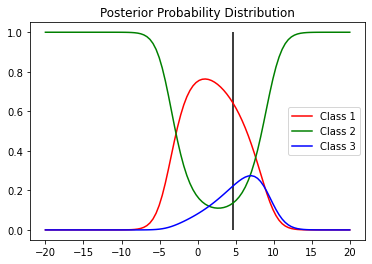

In [8]:
# plot the distribution, give a series of sample data
%matplotlib inline
func1 = lambdify(x, pw1, modules=['numpy'])
func2 = lambdify(x, pw2, modules=['numpy'])
func3 = lambdify(x, pw3, modules=['numpy'])

xx = np.linspace(-20, 20, 100)
plt.title('Posterior Probability Distribution')
plt.plot(xx, func1(xx), color = 'r', label = 'Class 1')
plt.plot(xx, func2(xx), color = 'g', label = 'Class 2')
plt.plot(xx, func3(xx), color = 'b', label = 'Class 3')
plt.legend()
plt.vlines(x = 4.7, ymin = 0, ymax = 1)

Figure 2. Posterior Probability 

### Problem 1 (3b)

As above figure shows, we can clearly see that when x = 4.7, x will belong to Class 1.
Alternatively, the analytical solution (MAP method ) is 0.61 generated from Class 1, as shown from below results:

$$p(w_1|x) =  \frac{p(x|w_1)\cdot p(w_1)} {\sum_{i=1}^{i=3} p(x|w_i)\cdot p(w_i)} = 0.61 $$
$$p(w_2|x) =  \frac{p(x|w_2)\cdot p(w_2)} {\sum_{i=1}^{i=3} p(x|w_i)\cdot p(w_i)} = 0.18 $$
$$p(w_3|x) =  \frac{p(x|w_3)\cdot p(w_3)} {\sum_{i=1}^{i=3} p(x|w_i)\cdot p(w_i)} = 0.21 $$

In [9]:
pw1.subs(x, 4.7), pw2.subs(x, 4.7), pw3.subs(x,4.7)

(0.638769505660379, 0.137390521490568, 0.223839972849053)

### Problem 2(1)

From the problem description, we know that negative cases $w_1$ follows uniform(0,1) and positive cases $w_2$ follows uniform(0.95, 3.95), which can be written as: 

$$p(x|w_1) = 1 for\ x\ between\ 0\ and\ 1,\ otherwise\ 0$$
$$p(x|w_2) = \frac{1}{3.95-0.95} for\ x \ between\ 0.95 \ and \ 3.95\ otherwise\ 0$$

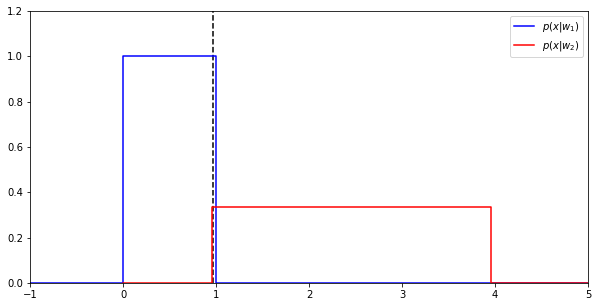

In [10]:
# xxx = np.linspace(0,5,50)
%matplotlib inline
figure, ax = plt.subplots(figsize = (10,5))
ax.set_xlim([-1,5])
ax.set_ylim([0,1.2])
ax.plot([-1, 0, 0,1, 1, 5], [0,0, 1,1,0,0], color = 'b',label = '$p(x|w_1)$')
ax.plot([0,0.95,0.95,3.95,3.95,5],[0,0,1/3,1/3,0,0], color = 'r',label = '$p(x|w_2)$')
ax.legend()
ax.vlines(x = 0.97, ymin = 0, ymax = 1.2, linestyle = '--')

### Problem 2(2a)

The false-negative means that we decide the negative but the truth is positive. So the probability should be underneath distribution of positive:


$$P(error|w_2) = \frac{0.97 - 0.95}{3} \cdot \frac{1}{2}
               = 0.00335
               $$
Where $\frac{1}{2}$ is the prior probability of $w_2$

### Problem 2(2b)

Similarly, false-negative means that we decide the positive but the truth is negative. So the probability should be underneath distribution of negative, which is:
    
$$P(error|w_1) = 
                \frac{1 - 0.97}{1} \cdot \frac{1}{2}  
                = 0.015
               $$
Where $\frac{1}{2}$ is the prior probability of $w_1$

### Problem 2(2c)

Assume the decision boundary is $\lambda$, the overall error is wrriten as 

$$P(error) = P(error|w_2) + P(error|w_1)\\
    = \frac{\lambda - 0.95}{3} \cdot \frac{1}{2} + \frac{1 - \lambda}{1} \cdot \frac{1}{2} \\
    = -\frac{\lambda}{3} + 0.342$$ where $\lambda \in [0.95,1]$ that's because the decision boundary should be somewhere of the overlapping of two distributions.

to minimize the overall error, $\lambda $ should be 1. Thus, the decision boundary should be 1 for equal prior probability case. in other words, 0.97 is not optimal boundary.

when decision boundary is 1, probability of overall error $P(error)$ is 
$$P(error) = \frac{0.05}{3} \cdot P(w_2) + 0 \cdot P(w_1)$$ where $P(w_1) + P(w_2) = 1$, to reduce the overall error, we should decrease positive case rate (i.e., $P(w_2)$).The optimal situation occurs when $P(w_2)=0$